### CardioVascular 

In [1]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
import joblib

In [2]:
data = pd.read_csv('cardio_train.csv',delimiter=';')

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
data.drop(columns=['id'],inplace=True)

In [5]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

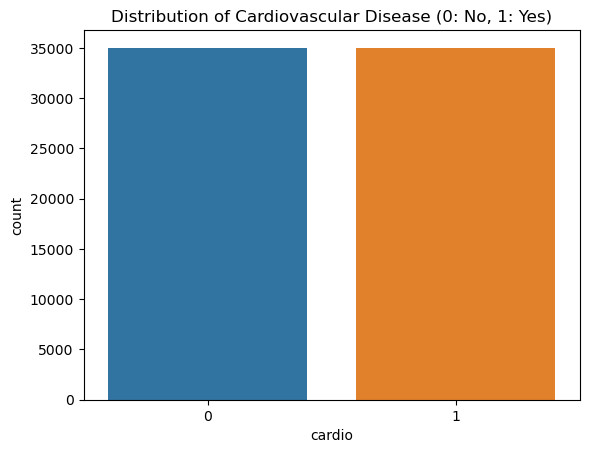

In [7]:
sns.countplot(x='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease (0: No, 1: Yes)')
plt.show()

c:\Users\Acer\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

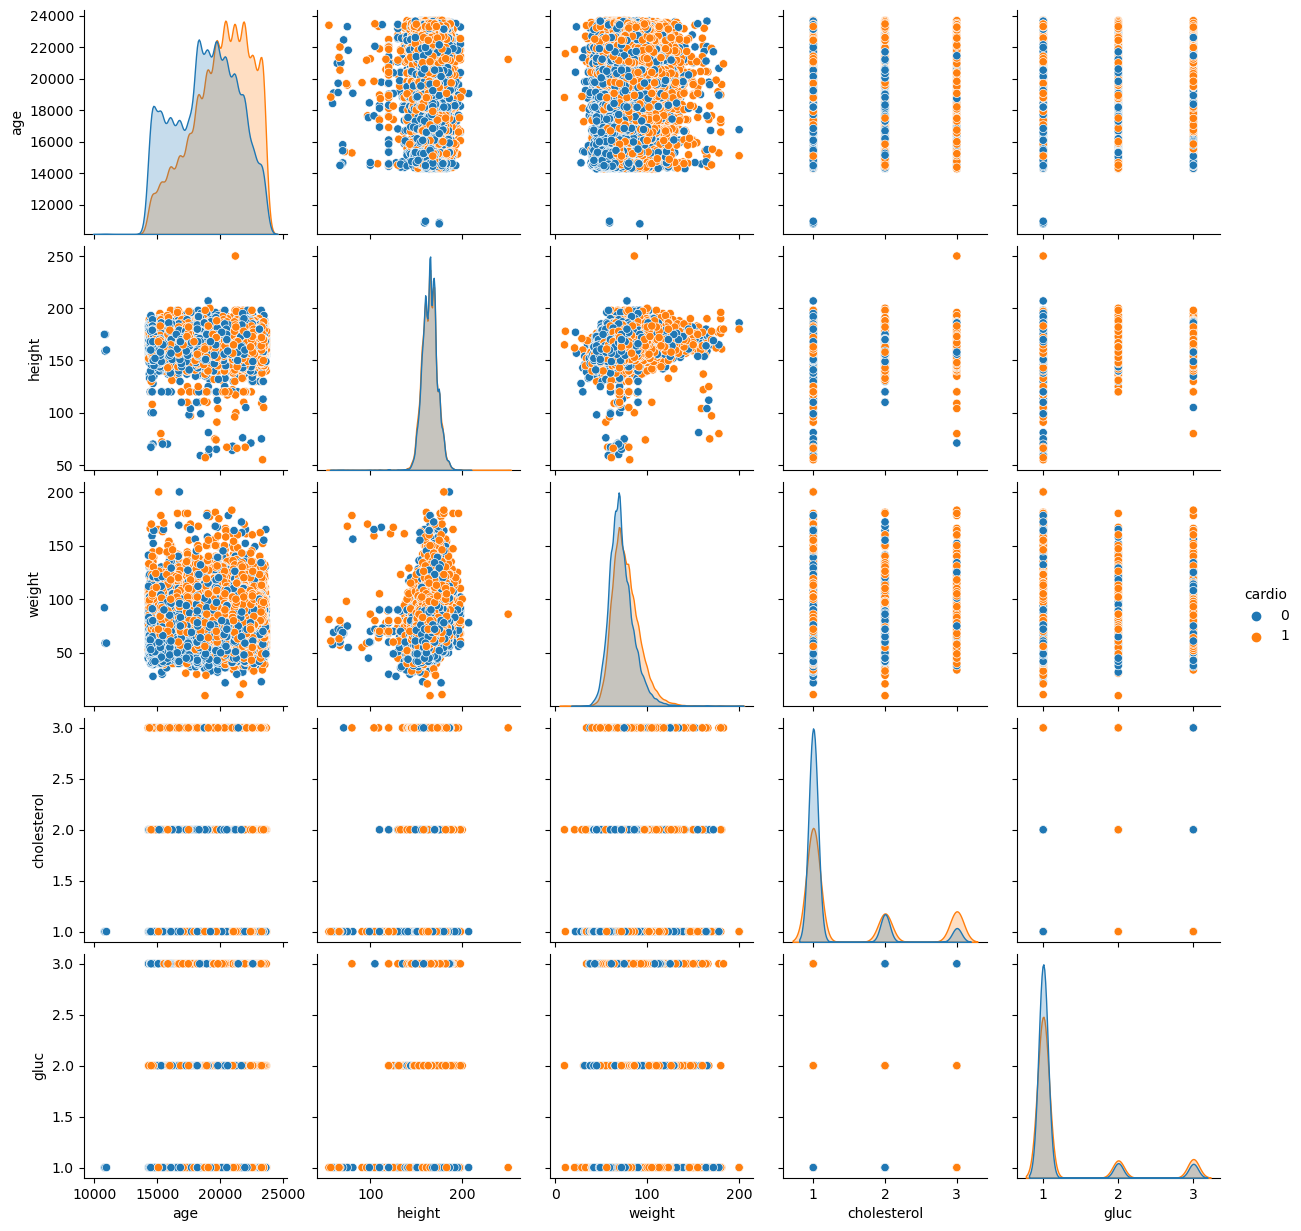

In [8]:
sns.pairplot(data[['age', 'height', 'weight', 'cholesterol', 'gluc', 'cardio']], hue='cardio')
plt.show()

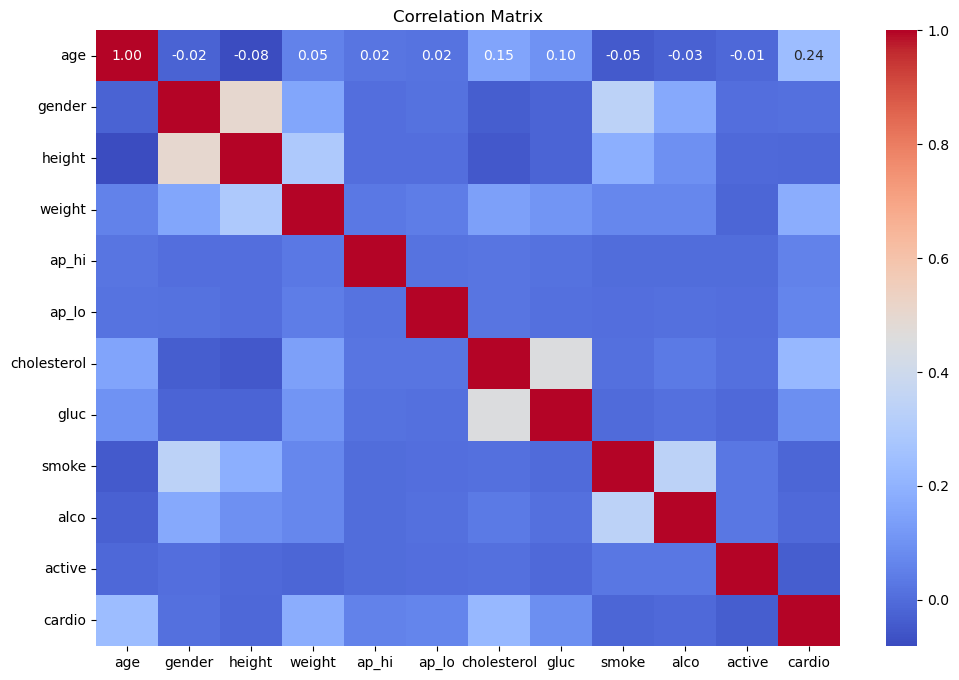

In [9]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [11]:
classifier_logistic = LogisticRegression(solver='liblinear')

In [12]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [13]:
y_prediction = classifier_logistic.predict(X_test)
training_data_accuracy = accuracy_score(y_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7097857142857142


In [14]:
precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7263238679969302
Recall: 0.674843126069595
F1 Score: 0.699637761514009


### K-Nearest Neighbor

In [15]:
classifier_KNN = KNeighborsClassifier(n_neighbors=40)

In [16]:
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [17]:
y_prediction = classifier_KNN.predict(X_test)
training_data_accuracy = accuracy_score(y_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7148571428571429


In [18]:
precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7536110178031575
Recall: 0.6399030233884769
F1 Score: 0.6921178466759217


### SVM Model

In [19]:
classifier_svm = svm.SVC(kernel='linear')

In [20]:
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_prediction = classifier_svm.predict(X_test)
training_data_accuracy = accuracy_score(y_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7236428571428571


In [25]:
precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)

### Decision Tree

In [26]:
claddifier_DT = DecisionTreeClassifier()

In [27]:
claddifier_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_prediction = claddifier_DT.predict(X_test)
training_data_accuracy = accuracy_score(y_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6295


In [31]:
precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6283945405937807
Recall: 0.636908157444381
F1 Score: 0.6326227069905801


### Random Forest

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=46)

In [36]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=46)

In [34]:
y_prediction = rf_classifier.predict(X_test)
training_data_accuracy = accuracy_score(y_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)

precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy score of the training data :  0.7172142857142857
Precision: 0.7234011415190985
Recall: 0.7049343981745579
F1 Score: 0.7140483929216324


### Saving Model

In [38]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46730,21770,1,156,64.0,140,80,2,1,0,0,1
48393,21876,1,170,85.0,160,90,1,1,0,0,1
41416,23270,1,151,90.0,130,80,1,1,0,0,1
34506,19741,1,159,97.0,120,80,1,1,0,0,1
43725,18395,1,164,68.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21525,20490,2,172,70.0,120,80,1,1,0,0,0
16276,16797,2,174,96.0,120,80,1,2,0,0,1
24390,22607,1,165,66.0,110,80,1,1,0,0,0
28061,19670,1,157,89.0,120,80,3,3,0,0,1


In [42]:
y_test

46730    1
48393    1
41416    1
34506    1
43725    0
        ..
21525    1
16276    1
24390    0
28061    1
63452    1
Name: cardio, Length: 14000, dtype: int64

In [39]:
joblib.dump(classifier_svm,'heart_svm_model.joblib')

['heart_svm_model.joblib']

In [40]:
model = joblib.load('heart_svm_model.joblib')

In [41]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [47]:
input_data = (21770,1,156,64.0,140,80,2,1,0,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('you not have disease')
else:
  print('you have disease')

[1]
you have disease


C:\Users\Acer\anaconda3\envs\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
for column in X.columns:
    print(column)

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
